# EDA para clasificacion segun el tipo de vino (RED - WHITE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('max_columns',None)

In [3]:
df_wr = pd.read_csv('winequality-red.csv', sep=';')
df_wr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_ww= pd.read_csv('winequality-white.csv', sep=';')
df_ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
print("Dimensiones del dataset de vino rojo: ",df_wr.shape)
print("Dimensiones del dataset de vino blanco: ", df_ww.shape)

Dimensiones del dataset de vino rojo:  (1599, 12)
Dimensiones del dataset de vino blanco:  (4898, 12)


| Variables | Descripcciòn |
|-----------|--------------|
|fixed acidity| most acids involved with wine or fixed or nonvolatile (do not evaporate readily).|
|volatile acidity| the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.|
|citric acid| found in small quantities, citric acid can add ‘freshness’ and flavor to wines.|
|residual sugar| the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.|
|chlorides| the amount of salt in the wine.|
|free sulfur dioxide| the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.|
|total sulfur dioxide| amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.|
|density| the density of water is close to that of water depending on the percent alcohol and sugar content.|
|pH| describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.|
|sulphates| a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.|
|alcohol| the percent alcohol content of the wine.|

### Vamos a combinar ambos dataset, asi que antes de hacerlos, creamos una nueva columna en cada uno donde se sepa que tipo de vino es: Rojo o Blanco

In [6]:
df_wr['type'] = 'Red'
df_ww['type'] = 'White'

In [7]:
df_ww.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,White


In [8]:
df_wr.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [9]:
df_wines = pd.concat([df_ww,df_wr], ignore_index= True)

In [10]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [11]:
df_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,Red


In [12]:
df_wines.shape

(6497, 13)

### Ahora contamos con un dataset de 6497 filas y 13 columnas, recordemos que se agregò una columna adicional para diferenciar el tipo de vino: Rojo o blanco.

In [13]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df_wines['type'] = df_wines['type'].astype('category')

In [15]:
df_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

#### No cuenta con datos nulos

In [16]:
df_wines[df_wines.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
7,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
8,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Red
6462,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Red
6465,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Red
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,Red


#### Cuenta con 1177 datos duplicados. Procedemos a eliminarlos, manteniendo uno de las filas.

In [17]:
df_wines = df_wines.drop_duplicates(keep='first')

In [18]:
df_wines.shape

(5320, 13)

#### Se observa que se redujo la cantidad de filas, de 6497 a 5320. Los 1177 datos duplicados fueron eliminados.

## Al eliminar las filas duplicadas me surgiò la siguiente pregunta. ¿Existirà un vino rojo y un vino blanco con las mismas caracteristicas?

In [19]:
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [20]:
df_wines[df_wines.duplicated(subset=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5734,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,Red
6029,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,Red


In [21]:
df_wines[(df_wines['fixed acidity'] == 6.7) & (df_wines['volatile acidity'] == 0.28) & (df_wines['citric acid'] == 0.28) & (df_wines['residual sugar'] == 2.4) & (df_wines['chlorides'] == 0.012) & (df_wines['free sulfur dioxide'] == 36.0) & (df_wines['total sulfur dioxide'] == 100.0) & (df_wines['density'] == 0.99064 ) & (df_wines['pH'] == 3.26) & (df_wines['sulphates'] == 0.39) & (df_wines['alcohol'] == 11.7) & (df_wines['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2631,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,White
5734,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,Red


In [22]:
df_wines[(df_wines['fixed acidity'] == 5.9) & (df_wines['volatile acidity'] == 0.19) & (df_wines['citric acid'] == 0.21) & (df_wines['residual sugar'] == 1.7) & (df_wines['chlorides'] == 0.045) & (df_wines['free sulfur dioxide'] == 57.0) & (df_wines['total sulfur dioxide'] == 135.0) & (df_wines['density'] == 0.99341 ) & (df_wines['pH'] == 3.32) & (df_wines['sulphates'] == 0.44) & (df_wines['alcohol'] == 9.5) & (df_wines['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3374,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,White
6029,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,Red


#### Demostramos que si pueden existir tanto vino blanco como vino rojo con las mismas caracteristicas, por consiguiente podriamos pensar que para clasificar un vino segun su tipo puede haber confusion por la ambiguedad.

<AxesSubplot:xlabel='type'>

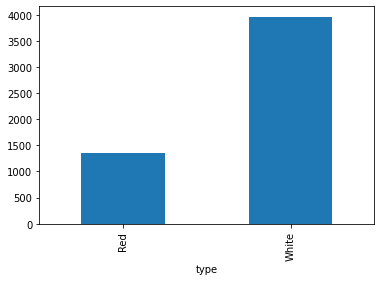

In [74]:
df_wines.groupby('type').size().plot.bar()

#### De igual forma, segùn el comportamiento del resto de datos... ¿Serà posible implementar un algortimos para clasificar un vino segun su tipo: Rojo o Blanco, con buenos resultados? 

In [129]:
from scipy.stats import mannwhitneyu

### Con cada una de las variables segun cada tipo de vino ¿Existe una diferencia significativa entre poblaciones?

Para ello, se implementarà el U-test para saber si hay diferencia significativa entre el vino rojo y vino blanco en cada variable para utilizarla en el algoritmo de clasificacion.


Hipótesis


H0: la probabilidad de que una observación de la población A sea mayor que una observación de la población B es igual que la probabilidad de que una observación de la población B sea mayor que una observación de la población A.

Ha: la probabilidad de que una observación de la población A sea mayor que una observación de la población B no es igual que la probabilidad de que una observación de la población B sea mayor que una observación de la población A. 

std:  1.3196706812560997


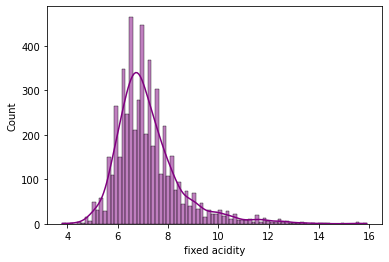

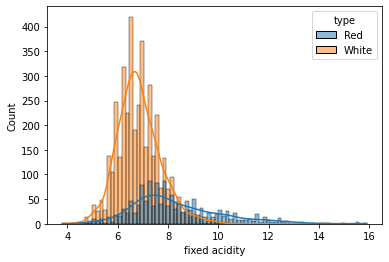

,fa_red,fa_white
count,1359.000000,3961.000000
mean,8.310596,6.839346
std,1.736990,0.866860
min,4.600000,3.800000
25%,7.100000,6.300000
50%,7.900000,6.800000
75%,9.200000,7.300000
max,15.900000,14.200000


In [106]:
print("std: ",df_wines['fixed acidity'].std())
sns.histplot(x =df_wines['fixed acidity'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'fixed acidity', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_fixed_acidity = pd.concat([df_wines[df_wines['type'] == 'Red']['fixed acidity'].describe(), df_wines[df_wines['type'] == 'White']['fixed acidity'].describe()], axis=1)
descriptive_fixed_acidity.columns= ['fa_red','fa_white']
descriptive_fixed_acidity

In [132]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['fixed acidity'],df_wines[df_wines['type'] == 'White']['fixed acidity'])
print(stat)
print(p)

1162871.5
2.0072748933333024e-215


std:  0.168248260213208


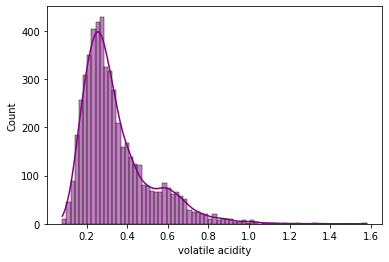

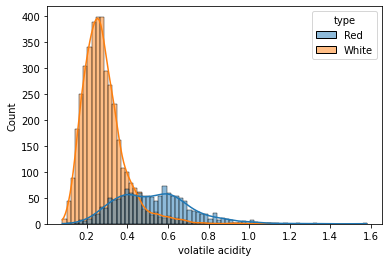

,va_red,va_white
count,1359.000000,3961.000000
mean,0.529478,0.280538
std,0.183031,0.103437
min,0.120000,0.080000
25%,0.390000,0.210000
50%,0.520000,0.260000
75%,0.640000,0.330000
max,1.580000,1.100000


In [107]:
print("std: ",df_wines['volatile acidity'].std())
sns.histplot(x =df_wines['volatile acidity'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'volatile acidity', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_volat_acidity = pd.concat([df_wines[df_wines['type'] == 'Red']['volatile acidity'].describe(), df_wines[df_wines['type'] == 'White']['volatile acidity'].describe()], axis=1)
descriptive_volat_acidity.columns= ['va_red','va_white']
descriptive_volat_acidity

In [133]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['volatile acidity'],df_wines[df_wines['type'] == 'White']['volatile acidity'])
print(stat)
print(p)

549587.0
0.0


std:  0.1471573342924657


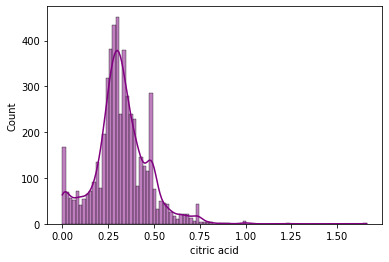

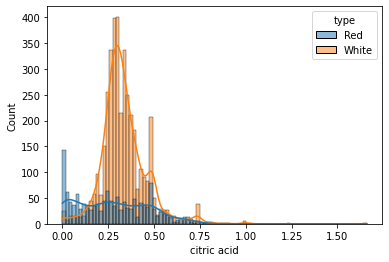

,ca_red,ca_white
count,1359.000000,3961.000000
mean,0.272333,0.334332
std,0.195537,0.122446
min,0.000000,0.000000
25%,0.090000,0.270000
50%,0.260000,0.320000
75%,0.430000,0.390000
max,1.000000,1.660000


In [108]:
print("std: ",df_wines['citric acid'].std())
sns.histplot(x =df_wines['citric acid'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'citric acid', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_citric_acidity = pd.concat([df_wines[df_wines['type'] == 'Red']['citric acid'].describe(), df_wines[df_wines['type'] == 'White']['citric acid'].describe()], axis=1)
descriptive_citric_acidity.columns= ['ca_red','ca_white']
descriptive_citric_acidity

In [134]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['citric acid'],df_wines[df_wines['type'] == 'White']['citric acid'])
print(stat)
print(p)

2129536.5
6.053244838110874e-31


std:  4.500180119377681


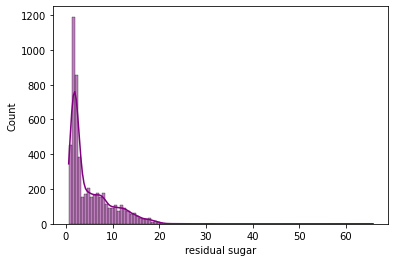

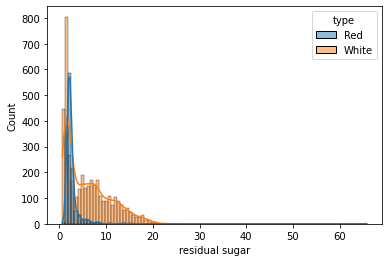

,rs_red,rs_white
count,1359.000000,3961.000000
mean,2.523400,5.914819
std,1.352314,4.861646
min,0.900000,0.600000
25%,1.900000,1.600000
50%,2.200000,4.700000
75%,2.600000,8.900000
max,15.500000,65.800000


In [109]:
print("std: ",df_wines['residual sugar'].std())
sns.histplot(x =df_wines['residual sugar'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'residual sugar', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_residual_sugar = pd.concat([df_wines[df_wines['type'] == 'Red']['residual sugar'].describe(), df_wines[df_wines['type'] == 'White']['residual sugar'].describe()], axis=1)
descriptive_residual_sugar.columns= ['rs_red','rs_white']
descriptive_residual_sugar

In [142]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['residual sugar'],df_wines[df_wines['type'] == 'White']['residual sugar'])
print(stat)
print(p)

1908797.0
4.339915515637906e-58


std:  0.036863314781293476


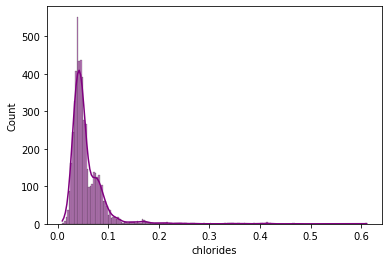

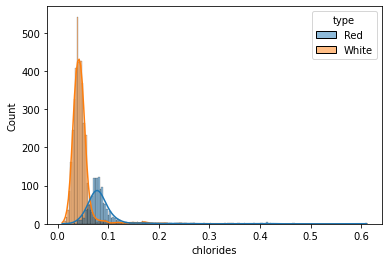

,c_red,c_white
count,1359.000000,3961.000000
mean,0.088124,0.045905
std,0.049377,0.023103
min,0.012000,0.009000
25%,0.070000,0.035000
50%,0.079000,0.042000
75%,0.091000,0.050000
max,0.611000,0.346000


In [110]:
print("std: ",df_wines['chlorides'].std())
sns.histplot(x =df_wines['chlorides'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'chlorides', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_chlorides = pd.concat([df_wines[df_wines['type'] == 'Red']['chlorides'].describe(), df_wines[df_wines['type'] == 'White']['chlorides'].describe()], axis=1)
descriptive_chlorides.columns= ['c_red','c_white']
descriptive_chlorides

In [141]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['chlorides'],df_wines[df_wines['type'] == 'White']['chlorides'])
print(stat)
print(p)

311229.0
0.0


std:  17.805044757279468


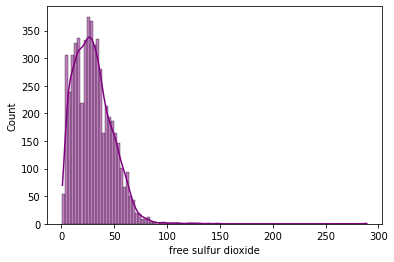

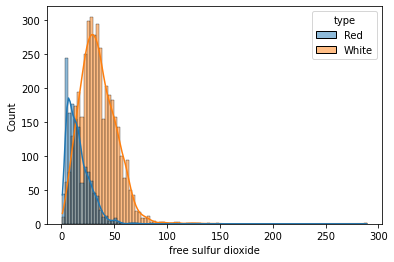

,fsd_red,fsd_white
count,1359.000000,3961.000000
mean,15.893304,34.889169
std,10.447270,17.210021
min,1.000000,2.000000
25%,7.000000,23.000000
50%,14.000000,33.000000
75%,21.000000,45.000000
max,72.000000,289.000000


In [111]:
print("std: ",df_wines['free sulfur dioxide'].std())
sns.histplot(x =df_wines['free sulfur dioxide'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'free sulfur dioxide', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_free_sulfur_dioxide = pd.concat([df_wines[df_wines['type'] == 'Red']['free sulfur dioxide'].describe(), df_wines[df_wines['type'] == 'White']['free sulfur dioxide'].describe()], axis=1)
descriptive_free_sulfur_dioxide.columns= ['fsd_red','fsd_white']
descriptive_free_sulfur_dioxide

In [140]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['free sulfur dioxide'],df_wines[df_wines['type'] == 'White']['free sulfur dioxide'])
print(stat)
print(p)

851364.0
7.4275822942743e-311


std:  56.774223208496984


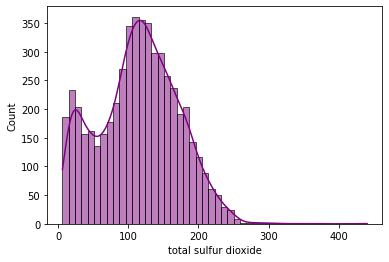

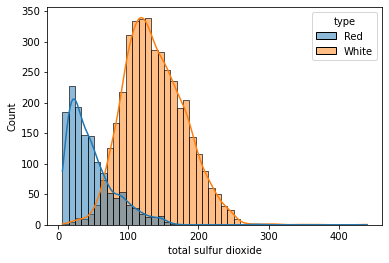

,tsd_red,tsd_white
count,1359.000000,3961.000000
mean,46.825975,137.193512
std,33.408946,43.129065
min,6.000000,9.000000
25%,22.000000,106.000000
50%,38.000000,133.000000
75%,63.000000,166.000000
max,289.000000,440.000000


In [112]:
print("std: ",df_wines['total sulfur dioxide'].std())
sns.histplot(x =df_wines['total sulfur dioxide'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'total sulfur dioxide', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_total_sulfur_dioxide = pd.concat([df_wines[df_wines['type'] == 'Red']['total sulfur dioxide'].describe(), df_wines[df_wines['type'] == 'White']['total sulfur dioxide'].describe()], axis=1)
descriptive_total_sulfur_dioxide.columns= ['tsd_red','tsd_white']
descriptive_total_sulfur_dioxide

In [139]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['total sulfur dioxide'],df_wines[df_wines['type'] == 'White']['total sulfur dioxide'])
print(stat)
print(p)

272176.5
0.0


std:  0.002965505063396285


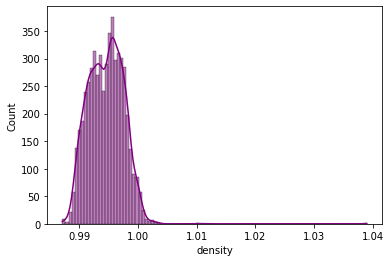

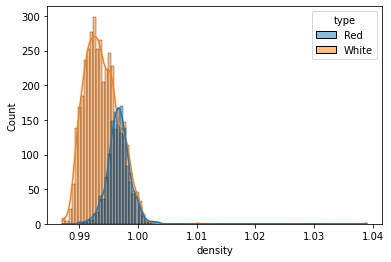

,d_red,d_white
count,1359.000000,3961.000000
mean,0.996709,0.993790
std,0.001869,0.002905
min,0.990070,0.987110
25%,0.995600,0.991620
50%,0.996700,0.993500
75%,0.997820,0.995710
max,1.003690,1.038980


In [113]:
print("std: ",df_wines['density'].std())
sns.histplot(x =df_wines['density'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'density', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_density = pd.concat([df_wines[df_wines['type'] == 'Red']['density'].describe(), df_wines[df_wines['type'] == 'White']['density'].describe()], axis=1)
descriptive_density.columns= ['d_red','d_white']
descriptive_density

In [138]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['density'],df_wines[df_wines['type'] == 'White']['density'])
print(stat)
print(p)

1075433.0
3.0254645898264006e-240


std:  0.1603792024362451


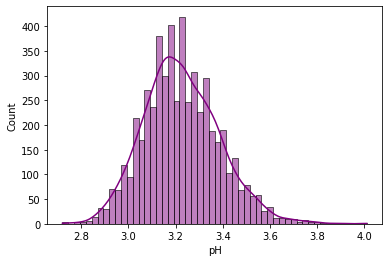

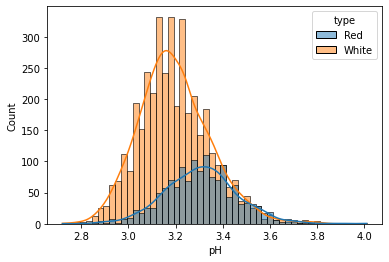

,pH_red,pH_white
count,1359.000000,3961.000000
mean,3.309787,3.195458
std,0.155036,0.151546
min,2.740000,2.720000
25%,3.210000,3.090000
50%,3.310000,3.180000
75%,3.400000,3.290000
max,4.010000,3.820000


In [114]:
print("std: ",df_wines['pH'].std())
sns.histplot(x =df_wines['pH'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'pH', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_pH = pd.concat([df_wines[df_wines['type'] == 'Red']['pH'].describe(), df_wines[df_wines['type'] == 'White']['pH'].describe()], axis=1)
descriptive_pH.columns= ['pH_red','pH_white']
descriptive_pH

In [137]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['pH'],df_wines[df_wines['type'] == 'White']['pH'])
print(stat)
print(p)

1555287.0
5.5148190880147354e-120


std:  0.14974292781635964


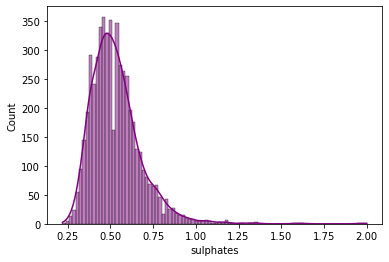

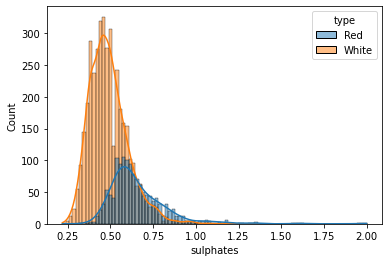

,s_red,s_white
count,1359.000000,3961.000000
mean,0.658705,0.490351
std,0.170667,0.113523
min,0.330000,0.220000
25%,0.550000,0.410000
50%,0.620000,0.480000
75%,0.730000,0.550000
max,2.000000,1.080000


In [115]:
print("std: ",df_wines['sulphates'].std())
sns.histplot(x =df_wines['sulphates'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'sulphates', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_sulphates = pd.concat([df_wines[df_wines['type'] == 'Red']['sulphates'].describe(), df_wines[df_wines['type'] == 'White']['sulphates'].describe()], axis=1)
descriptive_sulphates.columns= ['s_red','s_white']
descriptive_sulphates

In [136]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['sulphates'],df_wines[df_wines['type'] == 'White']['sulphates'])
print(stat)
print(p)

912890.5
1.1575670409463638e-290


std:  1.185932928254225


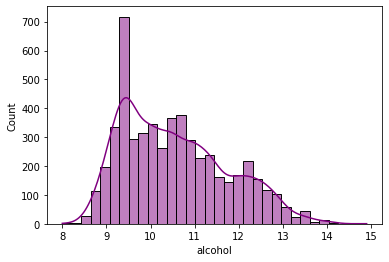

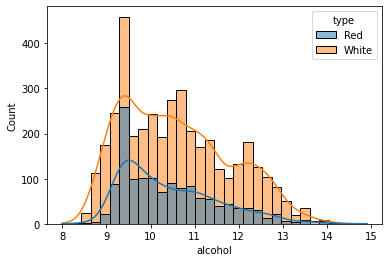

,al_red,al_white
count,1359.000000,3961.000000
mean,10.432315,10.589358
std,1.082065,1.217076
min,8.400000,8.000000
25%,9.500000,9.500000
50%,10.200000,10.400000
75%,11.100000,11.400000
max,14.900000,14.200000


In [116]:
print("std: ",df_wines['alcohol'].std())
sns.histplot(x =df_wines['alcohol'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'alcohol', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_alcohol = pd.concat([df_wines[df_wines['type'] == 'Red']['alcohol'].describe(), df_wines[df_wines['type'] == 'White']['alcohol'].describe()], axis=1)
descriptive_alcohol.columns= ['al_red','al_white']
descriptive_alcohol

In [135]:
stat, p = mannwhitneyu(df_wines[df_wines['type'] == 'Red']['alcohol'],df_wines[df_wines['type'] == 'White']['alcohol'])
print(stat)
print(p)

2513127.0
0.00012984430524088072


In [117]:
# df_wines.to_csv('df_wines', index=False)